In [1]:
import os

import pandas as pd
import pandas_gbq

from ydata_profiling import ProfileReport
from dotenv import load_dotenv
import ipywidgets

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

load_dotenv()
project_id = os.getenv("PROJECT_ID")

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns', None)

In [2]:
# Get data
tower_D_df = pandas_gbq.read_gbq(
    f"select * from towers.tower_D",
    project_id=project_id,
    use_bqstorage_api=True,
)


tower_D_df.set_index("ts", inplace=True)
tower_D_df.drop(columns=["timestamp_ms"], inplace=True)
tower_D_df.sort_index(inplace=True)
# Drop column breaking profiling pipeline
tower_D_df_drop = tower_D_df.drop(columns=['pan_tilt_unit_command_elapsed_time'])

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|


In [3]:
# tower_D_report = ProfileReport(tower_D_df_drop, tsmode=True, title='towers:tower_D')
# tower_D_report.to_file('../profiles/towers/tower_D.html')

In [4]:
tower_D_df.describe()

,solar_voltage,system_uptime,battery_percentage,camera_temp_sensor0,camera_temp_sensor1,camera_cooler_current,camera_drifting_pixels,camera_fpa_temperature,process_cpu_utilization,camera_seconds_since_nuc,lte_signal_received_power,lte_signal_to_noise_ratio,satellite_backhaul_uptime,lte_signal_received_quality,radio_signal_to_noise_ratio,camera_enclosure_temperature,satellite_backhaul_latency_ms,master_state_of_charge_percent,detection_rate_frames_per_second,contactor_solar_powerport_charging,computer_vision_tracking_latency_ms,all_batteries_state_of_charge_percent,satellite_backhaul_uplink_throughput_bps,satellite_backhaul_downlink_throughput_bps,slave0_state_of_charge_percent,slave1_state_of_charge_percent,slave2_state_of_charge_percent,radio_frequency_detection_count,radio_frequency_precise_location_detection_count,radio_frequency_detection_latency,track_count,radar_detections_count,pan_tilt_unit_pan_speed,pan_tilt_unit_tilt_speed,pan_tilt_unit_command_elapsed_time
count,13273.000000,21436.000000,21354.000000,21286.000000,21286.000000,21287.000000,21286.000000,21285.000000,21442.000000,21286.000000,21436.000000,21437.000000,0.0,21437.000000,14399.000000,21287.000000,0.0,13273.000000,17154.000000,13273.0,20024.000000,13273.000000,0.0,0.0,0.0,0.0,0.0,351.000000,8.000000,8.000000,39764.000000,3.977500e+04,26691.000000,26691.000000,3.923700e+04
mean,0.008780,44277.986830,99.909584,10.723049,15.785373,494.023234,33.647343,79.009844,5.350904,33906.497505,-92.613256,4.526733,NaN,-13.400074,29.475586,13.037154,NaN,99.834007,84.926508,0.0,143.834588,99.941185,NaN,NaN,NaN,NaN,NaN,0.169866,0.156250,10.199173,7.396762,5.717129e+05,4.192885,0.755621,1.102072e+07
std,0.003110,34778.680589,1.046897,6.277369,6.471923,36.221473,1390.797446,0.089804,0.663745,49871.508051,4.007991,2.361138,NaN,1.929095,4.900022,6.150389,NaN,1.464213,78.191017,0.0,189.292629,0.605081,NaN,NaN,NaN,NaN,NaN,0.113422,0.049552,10.853651,6.108695,6.030397e+05,16.883387,1.394464,2.155029e+09
min,0.000000,13.200000,83.233334,-4.000000,0.000000,404.100000,0.000000,78.666667,1.687729,-4.000000,-95.000000,-2.663636,NaN,-19.000000,19.458333,-2.000000,NaN,82.000000,0.000000,0.0,32.000000,88.000000,NaN,NaN,NaN,NaN,NaN,0.100000,0.100000,1.121946,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.006667,16263.775000,100.000000,6.000000,11.000000,466.600000,7.111111,79.000000,5.051605,5209.821429,-94.000000,3.191667,NaN,-13.000000,25.736111,9.000000,NaN,100.000000,34.365741,0.0,61.083333,100.000000,NaN,NaN,NaN,NaN,NaN,0.100000,0.100000,2.805823,2.000000,8.001750e+04,0.277437,0.055487,7.046980e-02
50%,0.009091,32354.650000,100.000000,11.000000,16.000000,495.888889,20.700000,79.000000,5.533629,17332.777778,-93.000000,4.200000,NaN,-13.000000,28.277778,13.000000,NaN,100.000000,50.152606,0.0,63.166667,100.000000,NaN,NaN,NaN,NaN,NaN,0.120000,0.175000,3.396285,6.666667,2.431920e+05,1.831083,0.166462,9.858842e-02
75%,0.010833,74266.800000,100.000000,15.000000,20.000000,521.436508,31.195455,79.000000,5.783728,34908.187500,-93.000000,5.233333,NaN,-13.000000,33.826389,17.000000,NaN,100.000000,116.379662,0.0,69.000000,100.000000,NaN,NaN,NaN,NaN,NaN,0.200000,0.200000,18.132740,11.000000,1.219713e+06,6.547508,0.887798,1.910357e-01
max,0.021667,120869.100000,100.000000,35.000000,40.000000,666.800000,202753.400000,80.000000,8.037148,269819.666667,-73.000000,19.641667,NaN,-8.000000,44.486111,36.000000,NaN,100.000000,1000.000000,0.0,1330.000000,100.000000,NaN,NaN,NaN,NaN,NaN,0.775000,0.200000,28.062296,56.666667,1.709004e+06,1746.353441,97.657736,4.268390e+11


In [5]:
# Isolate track creation metrics
BONUS_METRICS = tower_D_df.columns[-5:]
tower_D_df_bonus = tower_D_df[BONUS_METRICS]

In [6]:
tower_D_df_bonus.describe()

,track_count,radar_detections_count,pan_tilt_unit_pan_speed,pan_tilt_unit_tilt_speed,pan_tilt_unit_command_elapsed_time
count,39764.000000,3.977500e+04,26691.000000,26691.000000,3.923700e+04
mean,7.396762,5.717129e+05,4.192885,0.755621,1.102072e+07
std,6.108695,6.030397e+05,16.883387,1.394464,2.155029e+09
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.000000,8.001750e+04,0.277437,0.055487,7.046980e-02
50%,6.666667,2.431920e+05,1.831083,0.166462,9.858842e-02
75%,11.000000,1.219713e+06,6.547508,0.887798,1.910357e-01
max,56.666667,1.709004e+06,1746.353441,97.657736,4.268390e+11


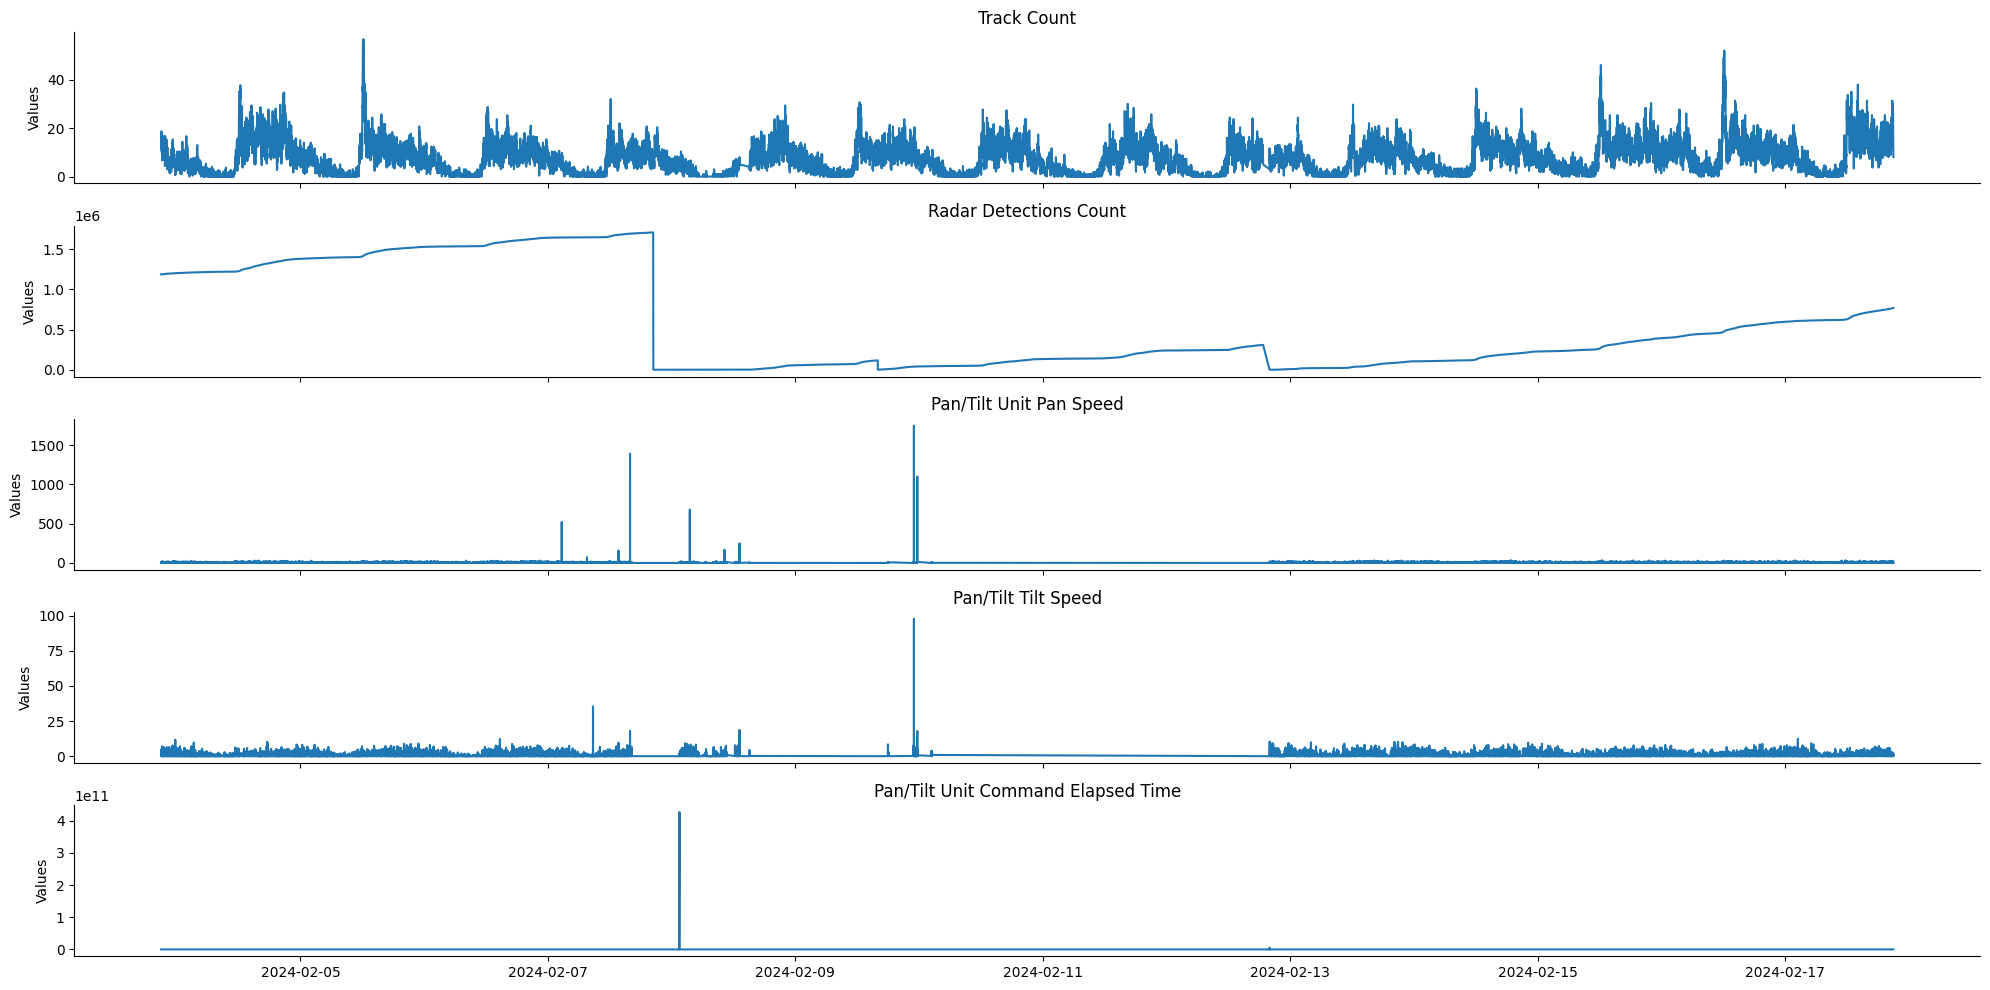

In [7]:
fig, ax = plt.subplots(len(BONUS_METRICS), 1, figsize=(20, 10), sharex=True)
titles = ["Track Count", "Radar Detections Count", "Pan/Tilt Unit Pan Speed", "Pan/Tilt Tilt Speed", "Pan/Tilt Unit Command Elapsed Time"]

for i, metric in enumerate(BONUS_METRICS):
    sns.lineplot(data=tower_D_df[metric], ax=ax[i])
    
    # TODO: get median
    # sns.lineplot(x='day', y='mean', hue='variable', linestyle='--', legend=False, data=df_long_avgs, ax=ax[i])
    #    mean_value = df_long_avgs[df_long_avgs['variable'] == tower]['mean'].iloc[0]
    # ax[i].text(x=df_long['day'].max(), y=mean_value, s=f'Average: {mean_value:.2f}', 
    #         color='white', va='center', ha='left', fontsize=9).set_backgroundcolor('grey')
    
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Values')
    ax[i].set_xlabel('')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
tower_D_df_drop.resample('1d').agg(['mean', 'std', 'count'])

solar_voltage                  system_uptime  \
                                   mean       std count           mean   
ts                                                                       
2024-01-18 00:00:00+00:00      0.011502  0.002429   111   87394.600000   
2024-01-19 00:00:00+00:00      0.011739  0.002700   720   92380.600000   
2024-01-20 00:00:00+00:00      0.011728  0.002631   720  101020.599811   
2024-01-21 00:00:00+00:00      0.010048  0.002498   720  109660.599621   
2024-01-22 00:00:00+00:00      0.008739  0.003462   720   93998.762425   
2024-01-23 00:00:00+00:00      0.008977  0.002850   720    6066.400000   
2024-01-24 00:00:00+00:00      0.008566  0.002657   720   14706.400000   
2024-01-25 00:00:00+00:00      0.008446  0.002820   720   23346.400637   
2024-01-26 00:00:00+00:00      0.007454  0.002690   554   24122.916833   
2024-01-27 00:00:00+00:00           NaN       NaN     0    6313.772756   
2024-01-28 00:00:00+00:00           NaN       NaN     0   14953.800000   
2024-01-29 00:00:00+00:00           NaN       NaN     0   23593.800000   
2024-01-30 00:00:00+00:00           NaN       NaN     0   32233.799074   
2024-01-31 00:00:00+00:00           NaN       NaN     0   40888.913744   
2024-02-01 00:00:00+00:00           NaN       NaN     0   49454.663226   
2024-02-02 00:00:00+00:00           NaN       NaN     0   58153.799811   
2024-02-03 00:00:00+00:00           NaN       NaN     0   66793.800000   
2024-02-04 00:00:00+00:00           NaN       NaN     0   75433.800631   
2024-02-05 00:00:00+00:00           NaN       NaN     0   84073.799811   
2024-02-06 00:00:00+00:00           NaN       NaN     0   92713.800000   
2024-02-07 00:00:00+00:00      0.006683  0.002148   585   86389.893349   
2024-02-08 00:00:00+00:00      0.008449  0.002730   664    5502.128094   
2024-02-09 00:00:00+00:00      0.008122  0.002283   720   14206.900000   
2024-02-10 00:00:00+00:00      0.006500  0.002851   720   22846.900000   
2024-02-11 00:00:00+00:00      0.007013  0.002809   714   31471.037655   
2024-02-12 00:00:00+00:00      0.009186  0.003050   684   32321.960879   
2024-02-13 00:00:00+00:00      0.007224  0.002536   718    5781.861195   
2024-02-14 00:00:00+00:00      0.009286  0.002625   720   14426.999432   
2024-02-15 00:00:00+00:00      0.010363  0.002946   714   23047.519666   
2024-02-16 00:00:00+00:00      0.008554  0.002946   720   31707.002315   
2024-02-17 00:00:00+00:00      0.008589  0.002587   609   39681.005064   

                                              battery_percentage            \
                                    std count               mean       std   
ts                                                                           
2024-01-18 00:00:00+00:00    386.243447   111         100.000000  0.000000   
2024-01-19 00:00:00+00:00   2495.884613   720         100.000000  0.000000   
2024-01-20 00:00:00+00:00   2495.884844   720         100.000000  0.000000   
2024-01-21 00:00:00+00:00   2495.884270   720          99.104506  3.205799   
2024-01-22 00:00:00+00:00  46734.647375   720          99.097659  3.213114   
2024-01-23 00:00:00+00:00   2495.884613   720         100.000000  0.000000   
2024-01-24 00:00:00+00:00   2495.884613   720         100.000000  0.000000   
2024-01-25 00:00:00+00:00   2495.884880   720         100.000000  0.000000   
2024-01-26 00:00:00+00:00  12712.245186   719         100.000000  0.000000   
2024-01-27 00:00:00+00:00   2495.930328   720         100.000000  0.000000   
2024-01-28 00:00:00+00:00   2495.884613   720         100.000000  0.000000   
2024-01-29 00:00:00+00:00   2495.884613   720         100.000000  0.000000   
2024-01-30 00:00:00+00:00   2495.885129   720         100.000000  0.000000   
2024-01-31 00:00:00+00:00   2506.285124   710         100.000000  0.000000   
2024-02-01 00:00:00+00:00   2567.466071   674         100.000000  0.000000   
2024-02-02 00:00:00+00:00   2495.884511   720         100.000000  0.000000   
2024-02-03 00:00:00+00:00  